In [17]:
# 데이터 import

import pandas as pd

bike_submission_df = pd.read_csv('./datasets/bike_sampleSubmission.csv')
bike_train_df = pd.read_csv('./datasets/bike_train.csv')
bike_test_df = pd.read_csv('./datasets/bike_test.csv')

In [33]:
bike_submission_df.describe()

,count
count,6493.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [18]:
bike_train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
bike_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [20]:
bike_train_df['datetime'] = bike_train_df['datetime'].apply(pd.to_datetime)
bike_test_df['datetime'] = bike_test_df['datetime'].apply(pd.to_datetime)

In [21]:
bike_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [22]:
bike_train_df['datetime'][0].hour

0

In [23]:
bike_train_df['year'] = bike_train_df['datetime'].apply(lambda x : x.year )
bike_train_df['month'] = bike_train_df['datetime'].apply(lambda x : x.month )
bike_train_df['day'] = bike_train_df['datetime'].apply(lambda x : x.day )
bike_train_df['hour'] = bike_train_df['datetime'].apply(lambda x : x.hour )

In [25]:
bike_test_df['year'] = bike_test_df['datetime'].apply(lambda x : x.year )
bike_test_df['month'] = bike_test_df['datetime'].apply(lambda x : x.month )
bike_test_df['day'] = bike_test_df['datetime'].apply(lambda x : x.day )
bike_test_df['hour'] = bike_test_df['datetime'].apply(lambda x : x.hour )

In [26]:
bike_train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [28]:
bike_train_df.drop(['datetime' , 'casual' , 'registered'] , axis=1 , inplace=True)


KeyError: "['datetime', 'casual', 'registered'] not found in axis"

In [31]:
bike_test_df.drop(['datetime'] , axis=1 , inplace=True)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np 

def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

def mae(y,pred):
    return mean_absolute_error(y,pred)

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mae(y,pred)

    print(f'RMSLE:{rmsle_val}, RMSE:{rmse_val}, MAE:{mae_val}')


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_train_df['count']
x_features = bike_train_df.drop(['count'], axis=1, inplace=False)

x_tr,x_test,y_tr,y_test = train_test_split(x_features, y_target, test_size=0.2, random_state=11)

lr_reg = LinearRegression()
lr_reg.fit( x_tr,y_tr)
pred= lr_reg.predict(x_test)

evaluate_regr(y_test,pred)

RMSLE:1.1890764480850984, RMSE:145.4337983785675, MAE:108.86650525087586


C:\Users\LG\AppData\Local\Temp\ipykernel_4520\1990880355.py:6: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


<Axes: >

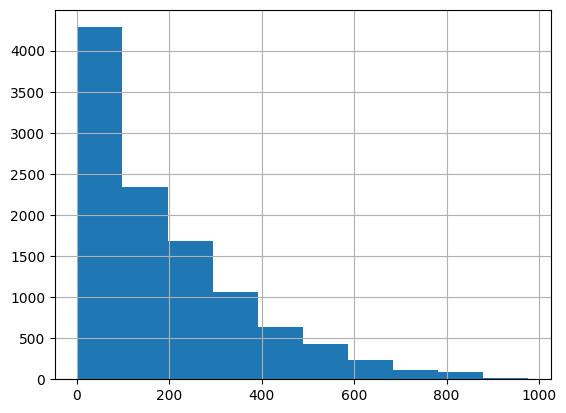

In [37]:
y_target.hist()

<Axes: >

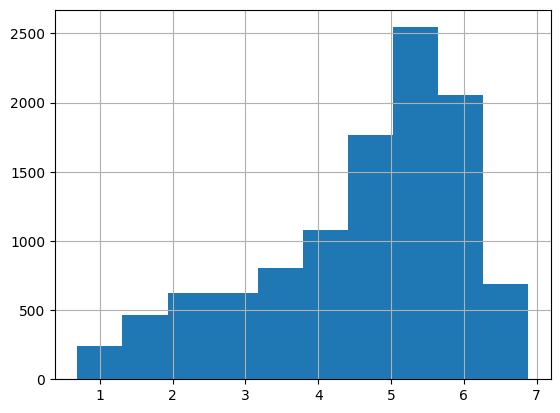

In [38]:
import numpy as np

y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [44]:
x_tr,x_test,y_tr,y_test = train_test_split(x_features, y_log_transform, test_size=0.2, random_state=11)

lr_reg = LinearRegression()
lr_reg.fit( x_tr,y_tr)
pred= lr_reg.predict(x_test)

pred = np.expm1(pred)
y_test = np.expm1(y_test)

evaluate_regr(y_test,pred)

RMSLE:1.0256986648320197, RMSE:163.21749904073283, MAE:109.73006762506456


In [40]:
import seaborn as sns 

coef = pd.Series(lr_reg.coef_ , index = x_features.columns)
coef_sort = coef.sort_values(ascending=False)

<Axes: ylabel='None'>

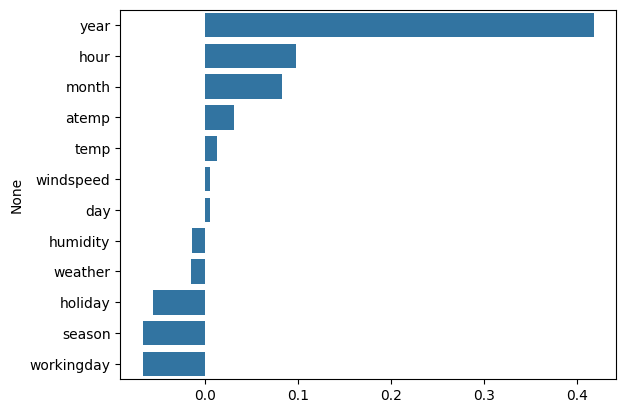

In [41]:
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [49]:
x_features_one = pd.get_dummies(x_features, columns = ['year','month', 'hour',
                                                       'holiday','workingday',
                                                       'season','weather'])

x_tr,x_test,y_tr,y_test = train_test_split(x_features_one, y_log_transform,
                                           test_size=0.2,random_state=11)

def get_model_predict(model, x_tr,x_test,y_tr,y_test,is_expm1=False):
    model.fit(x_tr,y_tr)
    pred= model.predict(x_test)
    if is_expm1:
        y_test=np.expm1(y_test)
        pred= np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test,pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,x_tr,x_test,y_tr,y_test,is_expm1=True)

### LinearRegression ###
RMSLE:0.5760281889844175, RMSE:97.26478763863656, MAE:62.667444467582264
### Ridge ###
RMSLE:0.5767460305894042, RMSE:98.30260472864079, MAE:63.33876324851495
### Lasso ###
RMSLE:0.6249017474661406, RMSE:115.41528410987861, MAE:73.47295102026236


In [50]:
x_tr

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
7560,22.14,25.760,88,19.0012,14,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False
8090,25.42,31.060,57,7.0015,17,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,False
30,16.40,20.455,76,12.9980,2,True,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
7290,18.86,22.725,88,0.0000,3,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
8665,32.80,37.120,52,12.9980,3,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023,22.96,26.515,64,11.0014,18,True,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
7259,27.06,31.060,61,11.0014,1,False,True,False,False,False,...,False,True,False,True,False,False,True,False,False,False
5200,10.66,12.880,38,15.0013,10,True,False,False,False,False,...,True,False,False,False,False,True,True,False,False,False
3775,25.42,27.275,94,7.0015,8,True,False,False,False,False,...,False,True,False,False,True,False,False,False,True,False


In [55]:
len(x_tr.columns)

55

<Axes: ylabel='None'>

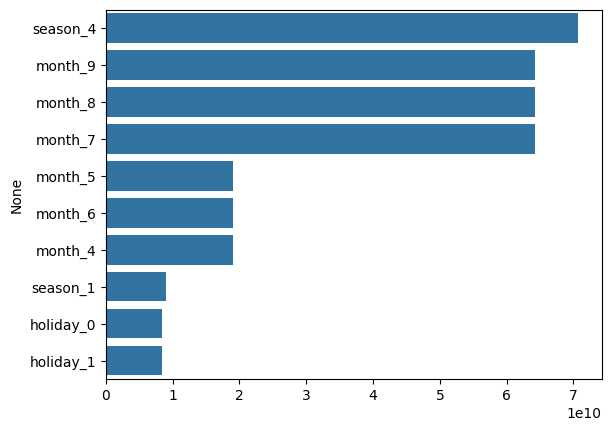

In [53]:
import seaborn as sns 
lr_reg = LinearRegression()
lr_reg.fit(x_tr , y_tr)
coef = pd.Series(lr_reg.coef_ , index = x_features_one.columns)
coef_sort = coef.sort_values(ascending=False)[:10]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [54]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
gdm_reg = GradientBoostingRegressor(n_estimators=500)

for model in [rf_reg, gdm_reg]:
    get_model_predict(model,x_tr,x_test,y_tr,y_test,is_expm1=True)

### RandomForestRegressor ###
RMSLE:0.32255856916826653, RMSE:49.33953408552092, MAE:30.458907692971422
### GradientBoostingRegressor ###
RMSLE:0.3141699471470845, RMSE:52.48144404720872, MAE:32.74703425417616
